# Object-Oriented Probabilistic Relational Model

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

In [1]:
import os
os.chdir("res")

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

O3PRM is inspired by relational language, directly based on the BN and improved by object oriented paradigms, where the focus is set on classes of objects and by defining relations among these objects (see http://o3prm.gitlab.io/ for more details)

<img src="images/o3prm.png" width="350">

## O3PRM syntax

In [2]:
with open('./Asia.o3prm','r') as prm:
  for line in prm.readlines():
    print(line,end="")

class Asia {

    boolean visitToAsia {
        [ 0.99,  // False
          0.01 ] // True
    };

    boolean tuberculosis dependson visitToAsia {
        // False | True
        [    0.99, 0.95,  // False
             0.01, 0.05 ] // True
    };

    boolean smoking {
        [ 0.50,  // False
          0.50 ] // True
    };

    boolean lungCancer dependson smoking {
        // False | True => smoking
        [    0.99, 0.90,  // False
             0.01, 0.10 ] // True
    };

    boolean bronchitis dependson smoking {
        // False | True => smoking
        [    0.70, 0.40,  // False
             0.30, 0.60 ] // True
    };

    boolean tubOrCancer dependson tuberculosis, lungCancer {
        //      False    ||     True      => tuberculosis
        //  False | True || False | True  => lungCancer
        [     1.00, 0.00,     0.00, 0.00,  // False
              0.00, 1.00,     1.00, 1.00 ] // True
    };

    boolean positiveXRay dependson tubOrCancer {
        // False | True =

## Using o3prm syntax for creating BayesNet

In [3]:
bn=gum.loadBN("./Asia.o3prm",verbose=False)
bn

(pyAgrum.BayesNet<double>@000001FAD7A185A0) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 18, mem: 288o}

In [4]:
bn=gum.loadBN("./aSys.o3prm")
bn

(pyAgrum.BayesNet<double>@000001FAD7A14B30) BN{nodes: 10, arcs: 9, domainSize: 1024, dim: 23, mem: 304o}

In [5]:
classpath="./ComplexPrinters"  
filename="./ComplexPrinters/fr/lip6/printers/system.o3prm"

system="Work"
bn=gum.loadBN(filename,system=system,classpath=classpath)

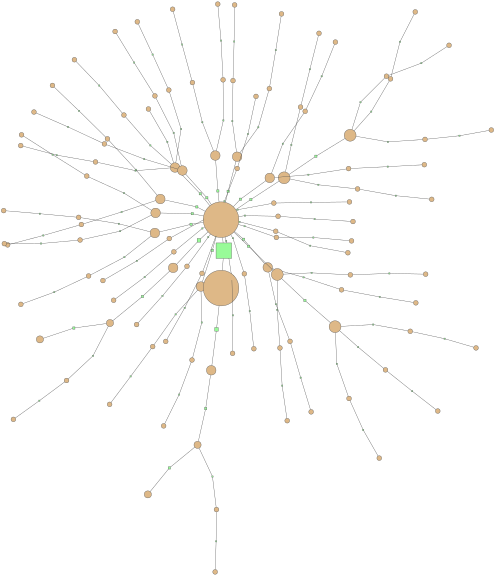

In [6]:
# the inference will take place in a rather large junction tree
gnb.showJunctionTreeMap(bn,scaleClique=0.1,scaleSep=0.05,lenEdge=1.2,size="8!")

In [7]:
gnb.showInference(bn,size="25!")

In [8]:
# if cairosvg is installed, one can export a graph (or inference) as a pdf
# gnb.exportInference(bn,filename="../out/ComplexPrinters.pdf")

In [9]:
bn=gum.loadBN("./aSys.o3prm")
gnb.sideBySide(
        gnb.getBN(bn,size='5'),
        gnb.getInference(bn,size='5')
        )

## Exploring Probabilistic Relational Model

In [10]:
classpath="./ComplexPrinters"
filename="./ComplexPrinters/complexprinters_system.o3prm"
explor=gum.PRMexplorer()
explor.load(filename)

In [11]:
for cl in explor.classes():
    print("Class : "+cl)
    print("  - Super class : "+ ("None" if explor.getSuperClass(cl)==None else explor.getSuperClass(cl)) )
    print("  - Implemented interface : ")
    for inter in explor.classImplements(cl):
        print("      "+inter)
    print("  - Direct sub-types : ")
    for ext in explor.getDirectSubClass(cl):
        print("      "+ext)
    print("  - Attributes : ")
    for (t,n, depensons) in explor.classAttributes(cl):
        s = ""
        for depenson in depensons:
            s = s + depenson + " "
        print("      "+t+" "+n+" ("+s+")")
    print("  - References : ")
    for (t, n, isArray) in explor.classReferences(cl):
        print("      "+t+("[]" if isArray else "")+" "+n)
    print("  - Aggragates : ")
    for (t, n, g, l, slots) in explor.classAggregates(cl):
        s = ""
        for slot in slots:
            s = s + slot + " "
        print("      "+t+" "+n+" "+g+" "+("NoLabel" if l==None else l)+ " (" +s+")")
    print("  - SlotChains : ")
    for (t, n, isMultiple) in explor.classSlotChains(cl):
        print("      "+t+" "+n+" "+("[]" if isMultiple else ""))
    print("  - Parameters : ")
    for param in explor.classParameters(cl):
        print("      "+param)
    #print("  - Dag : ")
    #(dic, dotString) = explor.classDag(cl)
    #print(dic)
    #print(dotString)
    
    print()

Class : PowerSupply
  - Super class : None
  - Implemented interface : 
  - Direct sub-types : 
  - Attributes : 
      t_state state ()
  - References : 
  - Aggragates : 
  - SlotChains : 
  - Parameters : 

Class : Room
  - Super class : None
  - Implemented interface : 
  - Direct sub-types : 
  - Attributes : 
  - References : 
      PowerSupply power
  - Aggragates : 
  - SlotChains : 
  - Parameters : 

Class : Computer
  - Super class : None
  - Implemented interface : 
      Equipment
  - Direct sub-types : 
  - Attributes : 
      t_degraded equipState (room.power.state )
      boolean can_print (equipState working_printer )
  - References : 
      Room room
      Printer[] printers
  - Aggragates : 
      mycount count_printers count true (degraded_printer functional_printer )
      boolean degraded_printer exists Degraded (printers.equipState )
      boolean working_printer exists true (degraded_printer functional_printer )
      boolean functional_printer exists OK (printe

In [12]:
print("The following lists the systems of the prm:\n")
systems=explor.getalltheSystems()
sys1=systems[0]
print("Name of the system: "+sys1[0]+"\n")
print("Nodes : dict(id: [name,type])")
print(sys1[1])
print("\n")
print("Arcs : List[(tail, head),(tail, head)...]")
print(sys1[2])

The following lists the systems of the prm:

Name of the system: aSys

Nodes : dict(id: [name,type])
{0: ('pow', 'PowerSupply'), 1: ('r', 'Room'), 2: ('bw_printers[0]', 'BWPrinter'), 3: ('bw_printers[1]', 'BWPrinter'), 4: ('bw_printers[2]', 'BWPrinter'), 5: ('bw_printers[3]', 'BWPrinter'), 6: ('bw_printers[4]', 'BWPrinter'), 7: ('bw_printers[5]', 'BWPrinter'), 8: ('bw_printers[6]', 'BWPrinter'), 9: ('bw_printers[7]', 'BWPrinter'), 10: ('bw_printers[8]', 'BWPrinter'), 11: ('bw_printers[9]', 'BWPrinter'), 12: ('color_printers[0]', 'ColorPrinter'), 13: ('color_printers[1]', 'ColorPrinter'), 14: ('c1', 'Computer'), 15: ('c2', 'Computer'), 16: ('p', 'ParamClass<lambda=0.4,t=4>'), 17: ('paramBis', 'ParamClass<lambda=0.001,t=4>')}


Arcs : List[(tail, head),(tail, head)...]
[]


In [13]:
gnb.showPotential(explor.cpf('Computer','equipState'))


In [14]:
for cl in explor.types():
    print("Type : "+cl)
    print("  - Super type : "+ ("None" if explor.getSuperType(cl)==None else explor.getSuperType(cl)) )
    print("  - Direct sub-types : ")
    for name in explor.getDirectSubTypes(cl):
        print("      "+name)
    print("  - Labels : ")
    for t in explor.getLabels(cl):
        print("      "+t)
    print("  - Labels mapping : ")
    for key,val in dict().items() if explor.getLabelMap(cl)==None else explor.getLabelMap(cl).items():
        print("      "+key+ ' -> '+val)
    print()

Type : boolean
  - Super type : None
  - Direct sub-types : 
      t_state
  - Labels : 
      false
      true
  - Labels mapping : 

Type : t_state
  - Super type : boolean-000001FAFBF73540
  - Direct sub-types : 
      t_degraded
      t_ink
      t_paper
  - Labels : 
      OK
      NOK
  - Labels mapping : 
      OK -> true
      NOK -> false

Type : t_degraded
  - Super type : t_state-000001FAFBF73810
  - Direct sub-types : 
  - Labels : 
      OK
      Dysfunctional
      Degraded
  - Labels mapping : 
      OK -> OK
      Dysfunctional -> NOK
      Degraded -> NOK

Type : t_ink
  - Super type : t_state-000001FAFBF73810
  - Direct sub-types : 
  - Labels : 
      NotEmpty
      Empty
  - Labels mapping : 
      NotEmpty -> OK
      Empty -> NOK

Type : t_paper
  - Super type : t_state-000001FAFBF73810
  - Direct sub-types : 
  - Labels : 
      Ready
      Jammed
      Empty
  - Labels mapping : 
      Ready -> OK
      Jammed -> NOK
      Empty -> NOK

Type : mycount
  - Super 

In [15]:
for cl in explor.interfaces():
    print("Interface : "+cl)
    print("  - Super interface : "+ ("None" if explor.getSuperInterface(cl)==None else explor.getSuperInterface(cl)) )
    print("  - Direct sub-interfaces : ")
    for name in explor.getDirectSubInterfaces(cl):
        print("      "+name)
    print("  - Implementations : ")
    for impl in explor.getImplementations(cl):
        print("      "+impl)
    print("  - Attributes : ")
    for (t,n) in explor.interAttributes(cl, allAttributes=True):
        print("      "+t+" "+n)
    print("  - References : ")
    for (t, n, isArray) in explor.interReferences(cl):
        print("      "+t+("[]" if isArray else "")+" "+n)
    print()

Interface : Equipment
  - Super interface : None
  - Direct sub-interfaces : 
      Printer
  - Implementations : 
      Computer
      SafeComputer
  - Attributes : 
      t_degraded equipState
      boolean equipState
      t_state equipState
  - References : 
      Room room

Interface : Printer
  - Super interface : Equipment
  - Direct sub-interfaces : 
  - Implementations : 
      BWPrinter
      ColorPrinter
  - Attributes : 
      t_degraded equipState
      boolean equipState
      boolean hasPaper
      boolean hasInk
      t_state equipState
  - References : 
      Room room



In [16]:
print(explor.isType("fr.lip6.printers.base.Printer"))
print(explor.isClass("fr.lip6.printers.base.Printer"))
print(explor.isInterface("fr.lip6.printers.base.Printer"))

False
False
False
